In [1]:
# 🎬 Netflix-style Movie Recommendation System

In [9]:
#Import Libraries & Load Data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# Load data
ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')

# Merge
df = pd.merge(ratings, movies, on='movieId')


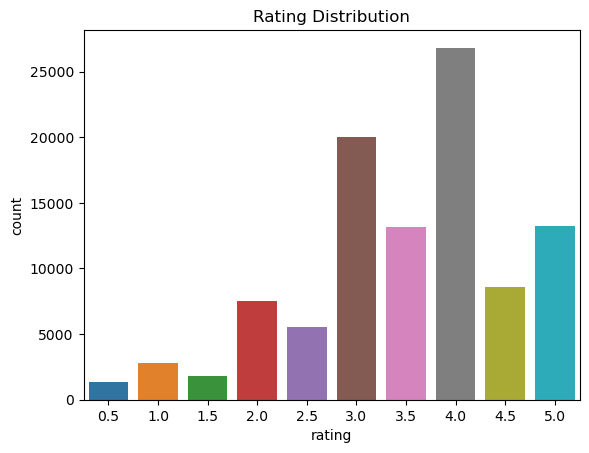

In [3]:
# 3. Rating Distribution Graph
sns.countplot(x='rating', data=df)
plt.title("Rating Distribution")
plt.show()


In [4]:
# Top 3 Popular Movies 
top_popular = df['title'].value_counts().head(3)
print("Top 3 Most Popular Movies:\n", top_popular)


Top 3 Most Popular Movies:
 title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Name: count, dtype: int64


In [5]:
# Top 3 Best Rated Movies
avg_rating = df.groupby('title')['rating'].mean()
rating_count = df['title'].value_counts()
filtered = avg_rating[rating_count >= 5]
top_rated = filtered.sort_values(ascending=False).head(3)
print("Top 3 Best Rated Movies:\n", top_rated)


Top 3 Best Rated Movies:
 title
Trial, The (Procès, Le) (1962)                      4.90
Three Billboards Outside Ebbing, Missouri (2017)    4.75
Memories of Murder (Salinui chueok) (2003)          4.70
Name: rating, dtype: float64


In [10]:
#Pivot Table & Similarity
pivot = df.pivot_table(index='userId', columns='title', values='rating').fillna(0)
user_similarity = cosine_similarity(pivot)
user_sim_df = pd.DataFrame(user_similarity, index=pivot.index, columns=pivot.index)

In [11]:
#Final Recommender
def recommend_movies(user_id, fav_genre=None):
    if user_id not in pivot.index:
        print("User not found.")
        return

    similar_users = user_sim_df[user_id].drop(user_id).sort_values(ascending=False).head(3)
    similar_user_ids = similar_users.index.tolist()
    
    seen_movies = df[df['userId'] == user_id]['title'].unique()
    similar_user_ratings = df[df['userId'].isin(similar_user_ids)]
    unseen_movies = similar_user_ratings[~similar_user_ratings['title'].isin(seen_movies)]
    
    if fav_genre:
        unseen_movies = unseen_movies[unseen_movies['genres'].str.lower().str.contains(fav_genre.lower())]
    
    top3 = unseen_movies.groupby('title')['rating'].mean().sort_values(ascending=False).head(3)
    print(f"\nTop 3 Recommended Movies for User {user_id} (Genre: {fav_genre or 'Any'}):")
    print(top3)

    # Plot favorites from similar users
    fav = unseen_movies.groupby('title')['rating'].mean().sort_values(ascending=False).head(5)
    plt.figure(figsize=(6,4))
    sns.barplot(x=fav.values, y=fav.index, palette='coolwarm')
    plt.title("Favorites from Similar Users")
    plt.xlabel("Avg Rating")
    plt.tight_layout()
    plt.show()


Enter your userId (e.g., 10):  6
Enter your favorite genre (optional):  action



Top 3 Recommended Movies for User 6 (Genre: action):
title
Mission: Impossible (1996)      4.0
Beverly Hills Cop III (1994)    3.0
Rock, The (1996)                3.0
Name: rating, dtype: float64


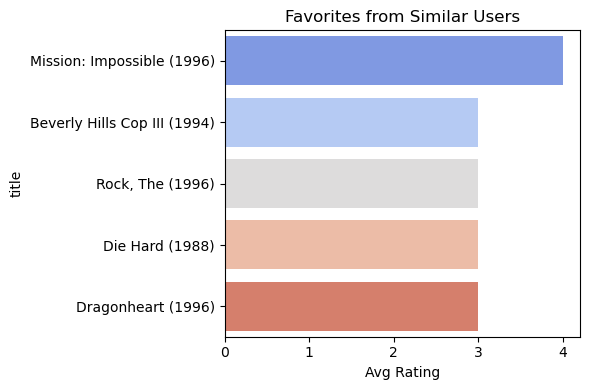

In [14]:
#Run Recommendation
uid = int(input("Enter your userId (e.g., 10): "))
genre = input("Enter your favorite genre (optional): ")
recommend_movies(uid, genre)


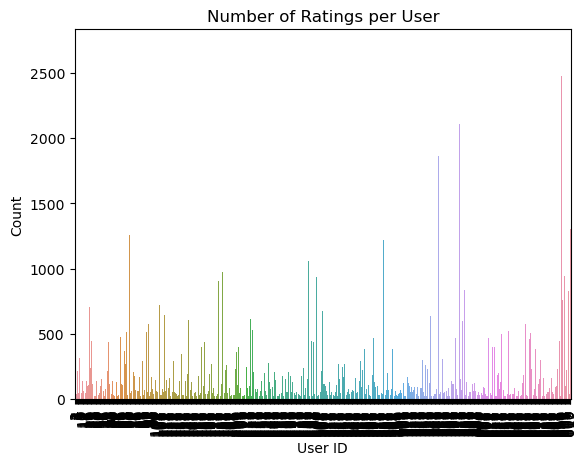

In [15]:
#Show Ratings Per User

user_counts = df['userId'].value_counts()
sns.barplot(x=user_counts.index, y=user_counts.values)
plt.title("Number of Ratings per User")
plt.xlabel("User ID")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()
